In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from IPython.display import display

data_path = '../Molecular_Properties'

In [3]:
files_names = !ls $data_path/*.csv
files_names

['../Molecular_Properties/dipole_moments.csv',
 '../Molecular_Properties/magnetic_shielding_tensors.csv',
 '../Molecular_Properties/mulliken_charges.csv',
 '../Molecular_Properties/potential_energy.csv',
 '../Molecular_Properties/sample_submission.csv',
 '../Molecular_Properties/scalar_coupling_contributions.csv',
 '../Molecular_Properties/structures.csv',
 '../Molecular_Properties/test.csv',
 '../Molecular_Properties/train.csv']

In [4]:
data_dict = {}

for name in files_names:
    data_dict[name.split('/')[-1][:-4]] = pd.read_csv(name)

In [5]:
df_complete = data_dict['train'].copy()
df_complete = df_complete.join(data_dict['potential_energy'].set_index('molecule_name'), on='molecule_name')
df_complete = df_complete.join(data_dict['dipole_moments'].set_index('molecule_name'), on='molecule_name', lsuffix='dipole_moments_')
df_complete = df_complete.join(data_dict['magnetic_shielding_tensors'].set_index(['molecule_name', 'atom_index']), on=['molecule_name', 'atom_index_0'], lsuffix='_atom0')
df_complete = df_complete.join(data_dict['magnetic_shielding_tensors'].set_index(['molecule_name', 'atom_index']), on=['molecule_name', 'atom_index_1'], lsuffix='_atom1')
df_complete = df_complete.join(data_dict['mulliken_charges'].set_index(['molecule_name', 'atom_index']), on=['molecule_name', 'atom_index_0'], lsuffix='_atom0')
df_complete = df_complete.join(data_dict['mulliken_charges'].set_index(['molecule_name', 'atom_index']), on=['molecule_name', 'atom_index_1'], lsuffix='_atom1')
df_complete = df_complete.join(data_dict['scalar_coupling_contributions'].set_index(['molecule_name', 'atom_index_0', 'atom_index_1']), on=['molecule_name', 'atom_index_0', 'atom_index_1'], rsuffix='_scc')
df_complete = df_complete.join(data_dict['structures'].set_index(['molecule_name', 'atom_index']), on=['molecule_name', 'atom_index_0'], lsuffix='_atom0_structure')
df_complete = df_complete.join(data_dict['structures'].set_index(['molecule_name', 'atom_index']), on=['molecule_name', 'atom_index_1'], lsuffix='_atom1_structure')

In [6]:
df= df_complete.drop(['id'], axis=1)
len(df)

4658147

In [7]:
#a bigger subsample for this model
df_subsample=  df.sample(frac=0.1, random_state=1)
len(df_subsample)

465815

In [8]:
df_subsample.to_csv('/Users/Iffy/Molecular_Properties/molecule_subsample.csv', index=False)

In [8]:
feature_target=  df_subsample[['fc', 'pso', 'sd', 'dso', 'mulliken_charge_atom1', 'YY', 'XX_atom1', 'XX', 'ZZ', 'YY_atom1',
                       'mulliken_charge', 'potential_energy', 'ZZ_atom1', 'Z', 'scalar_coupling_constant']]
feature_target

,fc,pso,sd,dso,mulliken_charge_atom1,YY,XX_atom1,XX,ZZ,YY_atom1,mulliken_charge,potential_energy,ZZ_atom1,Z,scalar_coupling_constant
2557043,2.348940,-0.033082,-0.034241,0.092030,0.232601,180.3960,29.5177,181.4930,182.7930,33.5564,-0.508960,-435.3620,25.1699,1.5065,2.373650
1571490,-9.521030,1.903460,0.374256,-2.072480,0.116264,30.6437,26.8083,28.6370,28.7841,26.9144,0.124500,-421.9332,33.7409,1.1443,-9.315790
3815279,2.822460,0.307475,-0.062896,-0.553075,0.114498,102.3440,28.5014,94.3560,120.7070,30.7883,0.052715,-459.0387,22.9905,2.3221,2.513960
3327074,0.365051,0.194738,-0.024773,-0.268798,0.096038,97.0485,30.2074,104.8590,105.2960,23.2356,0.270692,-460.3333,25.4791,1.5971,0.266218
842927,7.688050,0.437421,0.111036,-0.451560,0.111746,27.0696,35.8985,35.8979,29.9001,27.0690,0.111749,-418.1772,29.9001,-0.0005,7.784940
2140407,3.255910,0.329974,-0.018175,-0.392163,0.084225,102.3000,31.1637,131.5510,73.7504,31.2623,0.409009,-384.7619,26.2865,-1.2719,3.175540
3680350,6.403150,0.204172,0.008111,-0.383134,0.254727,-73.1443,27.3955,8.2437,68.7723,31.7620,0.163884,-437.9416,33.3706,1.5549,6.232300
2138509,103.204000,-0.271135,0.326960,1.176050,0.094574,111.7740,27.5733,112.7430,107.9920,26.5807,-0.195095,-400.7982,28.6064,1.1448,104.436000
764496,-14.941700,2.464970,0.364028,-2.744870,0.145777,28.1549,30.8524,30.7456,30.3039,27.3038,0.145833,-364.9921,31.0117,-0.0023,-14.857600
3520100,6.724470,0.175627,-0.091349,-0.411963,0.093734,103.4430,28.2487,-6.7723,93.6850,34.1253,-0.061302,-388.5033,26.3072,0.6673,6.396780


In [9]:
#these features were chosen due to the results of lightgbm model from the SNS and LGB EDA notebook
features= df_subsample[['fc', 'pso', 'sd', 'dso', 'mulliken_charge_atom1', 'YY', 'XX_atom1', 'XX', 'ZZ', 'YY_atom1',
                       'mulliken_charge', 'potential_energy', 'ZZ_atom1', 'Z']]

In [10]:
features

,fc,pso,sd,dso,mulliken_charge_atom1,YY,XX_atom1,XX,ZZ,YY_atom1,mulliken_charge,potential_energy,ZZ_atom1,Z
2557043,2.348940,-0.033082,-0.034241,0.092030,0.232601,180.3960,29.5177,181.4930,182.7930,33.5564,-0.508960,-435.3620,25.1699,1.5065
1571490,-9.521030,1.903460,0.374256,-2.072480,0.116264,30.6437,26.8083,28.6370,28.7841,26.9144,0.124500,-421.9332,33.7409,1.1443
3815279,2.822460,0.307475,-0.062896,-0.553075,0.114498,102.3440,28.5014,94.3560,120.7070,30.7883,0.052715,-459.0387,22.9905,2.3221
3327074,0.365051,0.194738,-0.024773,-0.268798,0.096038,97.0485,30.2074,104.8590,105.2960,23.2356,0.270692,-460.3333,25.4791,1.5971
842927,7.688050,0.437421,0.111036,-0.451560,0.111746,27.0696,35.8985,35.8979,29.9001,27.0690,0.111749,-418.1772,29.9001,-0.0005
2140407,3.255910,0.329974,-0.018175,-0.392163,0.084225,102.3000,31.1637,131.5510,73.7504,31.2623,0.409009,-384.7619,26.2865,-1.2719
3680350,6.403150,0.204172,0.008111,-0.383134,0.254727,-73.1443,27.3955,8.2437,68.7723,31.7620,0.163884,-437.9416,33.3706,1.5549
2138509,103.204000,-0.271135,0.326960,1.176050,0.094574,111.7740,27.5733,112.7430,107.9920,26.5807,-0.195095,-400.7982,28.6064,1.1448
764496,-14.941700,2.464970,0.364028,-2.744870,0.145777,28.1549,30.8524,30.7456,30.3039,27.3038,0.145833,-364.9921,31.0117,-0.0023
3520100,6.724470,0.175627,-0.091349,-0.411963,0.093734,103.4430,28.2487,-6.7723,93.6850,34.1253,-0.061302,-388.5033,26.3072,0.6673


In [11]:
target= df_subsample[['scalar_coupling_constant']]
target

,scalar_coupling_constant
2557043,2.373650
1571490,-9.315790
3815279,2.513960
3327074,0.266218
842927,7.784940
2140407,3.175540
3680350,6.232300
2138509,104.436000
764496,-14.857600
3520100,6.396780


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
feature_train, feature_test, target_train, target_test= train_test_split(features, target, test_size=0.1)

In [14]:
print('total feature training features: ', len(feature_train))
print('total feature testing features: ', len(feature_test))
print('total target training features: ', len(target_train))
print('total target testing features: ', len(target_test))

total feature training features:  419233
total feature testing features:  46582
total target training features:  419233
total target testing features:  46582


In [15]:
feature_train.shape

(419233, 14)

In [16]:
target_train.shape

(419233, 1)

In [17]:
import lightgbm

/Users/Iffy/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [18]:
#just to see if I missed any categorical. Don't need it
categorical_features = [c for c, col in enumerate(df_subsample.columns) if 'cat' in col]
categorical_features

[]

In [19]:
train_data = lightgbm.Dataset(feature_train, label=target_train, categorical_feature=categorical_features)
test_data = lightgbm.Dataset(feature_test, label=target_test)

In [20]:
#basic parameter: same as before
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}


In [21]:
model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

/Users/Iffy/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/Iffy/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's auc: 0.999131
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.995475
[3]	valid_0's auc: 0.996144
[4]	valid_0's auc: 0.998735
[5]	valid_0's auc: 0.998963
[6]	valid_0's auc: 0.999076
[7]	valid_0's auc: 0.999338
[8]	valid_0's auc: 0.999269
[9]	valid_0's auc: 0.999186
[10]	valid_0's auc: 0.999095
[11]	valid_0's auc: 0.99905
[12]	valid_0's auc: 0.999101
[13]	valid_0's auc: 0.999138
[14]	valid_0's auc: 0.999073
[15]	valid_0's auc: 0.99918
[16]	valid_0's auc: 0.999081
[17]	valid_0's auc: 0.999142
[18]	valid_0's auc: 0.999056
[19]	valid_0's auc: 0.999013
[20]	valid_0's auc: 0.998962
[21]	valid_0's auc: 0.998934
[22]	valid_0's auc: 0.998851
[23]	valid_0's auc: 0.998811
[24]	valid_0's auc: 0.998723
[25]	valid_0's auc: 0.998852
[26]	valid_0's auc: 0.998796
[27]	valid_0's auc: 0.999001
[28]	valid_0's auc: 0.999142
[29]	valid_0's auc: 0.99911
[30]	valid_0's auc: 0.99908
[31]	valid_0's auc: 0.999192
[32]	valid_0's auc: 0.999168
[33]	valid_0's auc: 0.

[278]	valid_0's auc: 0.999966
[279]	valid_0's auc: 0.999966
[280]	valid_0's auc: 0.999966
[281]	valid_0's auc: 0.999966
[282]	valid_0's auc: 0.999966
[283]	valid_0's auc: 0.999966
[284]	valid_0's auc: 0.999966
[285]	valid_0's auc: 0.999967
[286]	valid_0's auc: 0.999967
[287]	valid_0's auc: 0.999967
[288]	valid_0's auc: 0.999968
[289]	valid_0's auc: 0.999968
[290]	valid_0's auc: 0.999968
[291]	valid_0's auc: 0.999968
[292]	valid_0's auc: 0.999968
[293]	valid_0's auc: 0.999969
[294]	valid_0's auc: 0.999969
[295]	valid_0's auc: 0.999969
[296]	valid_0's auc: 0.999969
[297]	valid_0's auc: 0.99997
[298]	valid_0's auc: 0.99997
[299]	valid_0's auc: 0.99997
[300]	valid_0's auc: 0.99997
[301]	valid_0's auc: 0.99997
[302]	valid_0's auc: 0.99997
[303]	valid_0's auc: 0.99997
[304]	valid_0's auc: 0.999971
[305]	valid_0's auc: 0.999971
[306]	valid_0's auc: 0.999971
[307]	valid_0's auc: 0.999971
[308]	valid_0's auc: 0.999971
[309]	valid_0's auc: 0.999971
[310]	valid_0's auc: 0.999971
[311]	valid_0's a

[561]	valid_0's auc: 0.99998
[562]	valid_0's auc: 0.99998
[563]	valid_0's auc: 0.99998
[564]	valid_0's auc: 0.99998
[565]	valid_0's auc: 0.99998
[566]	valid_0's auc: 0.99998
[567]	valid_0's auc: 0.99998
[568]	valid_0's auc: 0.99998
[569]	valid_0's auc: 0.99998
[570]	valid_0's auc: 0.99998
[571]	valid_0's auc: 0.99998
[572]	valid_0's auc: 0.99998
[573]	valid_0's auc: 0.99998
[574]	valid_0's auc: 0.99998
[575]	valid_0's auc: 0.99998
[576]	valid_0's auc: 0.99998
[577]	valid_0's auc: 0.99998
[578]	valid_0's auc: 0.99998
[579]	valid_0's auc: 0.99998
[580]	valid_0's auc: 0.999981
[581]	valid_0's auc: 0.999981
[582]	valid_0's auc: 0.99998
[583]	valid_0's auc: 0.999981
[584]	valid_0's auc: 0.999981
[585]	valid_0's auc: 0.999981
[586]	valid_0's auc: 0.999981
[587]	valid_0's auc: 0.999981
[588]	valid_0's auc: 0.999981
[589]	valid_0's auc: 0.999981
[590]	valid_0's auc: 0.999981
[591]	valid_0's auc: 0.999981
[592]	valid_0's auc: 0.999981
[593]	valid_0's auc: 0.999981
[594]	valid_0's auc: 0.999981


[841]	valid_0's auc: 0.999983
[842]	valid_0's auc: 0.999983
[843]	valid_0's auc: 0.999982
[844]	valid_0's auc: 0.999983
[845]	valid_0's auc: 0.999983
[846]	valid_0's auc: 0.999983
[847]	valid_0's auc: 0.999983
[848]	valid_0's auc: 0.999983
[849]	valid_0's auc: 0.999983
[850]	valid_0's auc: 0.999983
[851]	valid_0's auc: 0.999983
[852]	valid_0's auc: 0.999983
[853]	valid_0's auc: 0.999983
[854]	valid_0's auc: 0.999983
[855]	valid_0's auc: 0.999983
[856]	valid_0's auc: 0.999983
[857]	valid_0's auc: 0.999983
[858]	valid_0's auc: 0.999983
[859]	valid_0's auc: 0.999983
[860]	valid_0's auc: 0.999983
[861]	valid_0's auc: 0.999983
[862]	valid_0's auc: 0.999983
[863]	valid_0's auc: 0.999983
[864]	valid_0's auc: 0.999983
[865]	valid_0's auc: 0.999983
[866]	valid_0's auc: 0.999983
[867]	valid_0's auc: 0.999983
[868]	valid_0's auc: 0.999983
[869]	valid_0's auc: 0.999983
[870]	valid_0's auc: 0.999983
[871]	valid_0's auc: 0.999983
[872]	valid_0's auc: 0.999983
[873]	valid_0's auc: 0.999983
[874]	vali

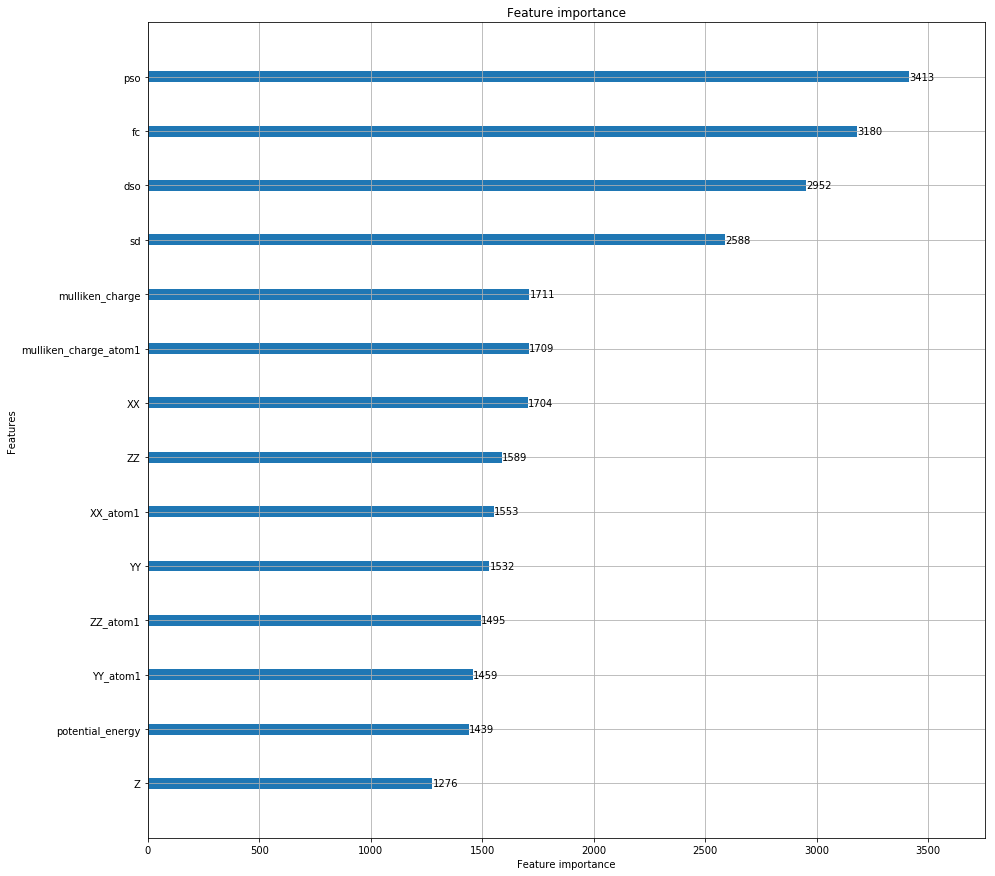

In [22]:
#Wanted to visualize the weight difference between each features. heavy imbalance between top 4 and the rest
ax = lightgbm.plot_importance(model, max_num_features=40, figsize=(15,15))
plt.show()

Creation of OLS

In [23]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [24]:
import seaborn as sns

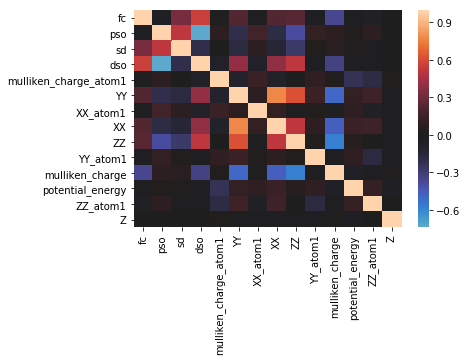

In [25]:
sns.heatmap(features.corr(), center=0);

In [26]:
X= feature_train
y= target_train
model= sm.OLS(y, X).fit()
predictions= model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     scalar_coupling_constant   R-squared (uncentered):                   1.000
Model:                                  OLS   Adj. R-squared (uncentered):              1.000
Method:                       Least Squares   F-statistic:                          6.683e+15
Date:                      Wed, 18 Sep 2019   Prob (F-statistic):                        0.00
Time:                              20:26:34   Log-Likelihood:                      3.3537e+06
No. Observations:                    419233   AIC:                                 -6.707e+06
Df Residuals:                        419219   BIC:                                 -6.707e+06
Df Model:                                14                                                  
Covariance Type:                  nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
fc                        1.0000   6.17e-09   1.62e+08      0.000       1.000       1.000
pso                       1.0000   3.71e-07   2.69e+06      0.000       1.000       1.000
sd                        1.0000   1.21e-06   8.23e+05      0.000       1.000       1.000
dso                       1.0000   3.45e-07    2.9e+06      0.000       1.000       1.000
mulliken_charge_atom1  1.901e-06      3e-06      0.634      0.526   -3.97e-06    7.77e-06
YY                      2.95e-09   3.06e-09      0.964      0.335   -3.05e-09    8.95e-09
XX_atom1               2.492e-08   3.64e-08      0.685      0.494   -4.64e-08    9.62e-08
XX                    -2.469e-09   2.59e-09     -0.952      0.341   -7.55e-09    2.62e-09
ZZ                    -4.935e-09   3.24e-09     -1.525      0.127   -1.13e-08    1.41e-09
YY_atom1                2.09e-08   3.33e-08      0.629      0.530   -4.43e-08    8.61e-08
mulliken_charge       -1.097e-06   6.96e-07     -1.576      0.115   -2.46e-06    2.67e-07
potential_energy      -1.581e-09   2.79e-09     -0.567      0.571   -7.05e-09    3.89e-09
ZZ_atom1              -5.519e-08   2.97e-08     -1.859      0.063   -1.13e-07    2.99e-09
Z                     -1.668e-07   1.24e-07     -1.349      0.177   -4.09e-07    7.55e-08
==============================================================================
Omnibus:                   141015.913   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         48642450.088
Skew:                          -0.085   Prob(JB):                         0.00
Kurtosis:                      55.770   Cond. No.                     1.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It seems that only fc, pso, sd and dso play significant role. Let's isolate them

In [27]:
X= feature_train[['fc', 'pso', 'sd', 'dso']]
y= target_train
model= sm.OLS(y, X).fit()
predictions= model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     scalar_coupling_constant   R-squared (uncentered):                   1.000
Model:                                  OLS   Adj. R-squared (uncentered):              1.000
Method:                       Least Squares   F-statistic:                          2.339e+16
Date:                      Wed, 18 Sep 2019   Prob (F-statistic):                        0.00
Time:                              20:26:35   Log-Likelihood:                      3.3537e+06
No. Observations:                    419233   AIC:                                 -6.707e+06
Df Residuals:                        419229   BIC:                                 -6.707e+06
Df Model:                                 4                                                  
Covariance Type:                  nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
fc             1.0000    5.6e-09   1.79e+08      0.000       1.000       1.000
pso            1.0000   3.49e-07   2.87e+06      0.000       1.000       1.000
sd             1.0000   1.15e-06   8.66e+05      0.000       1.000       1.000
dso            1.0000   3.07e-07   3.26e+06      0.000       1.000       1.000
==============================================================================
Omnibus:                   141098.420   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         48650131.028
Skew:                          -0.091   Prob(JB):                         0.00
Kurtosis:                      55.774   Cond. No.                         350.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let's try with the other variables

In [28]:
X= feature_train[['mulliken_charge_atom1', 'YY', 'XX_atom1', 'XX', 'ZZ', 'YY_atom1', 'mulliken_charge', 
                  'potential_energy', 'ZZ_atom1', 'Z']]
y= target_train
model= sm.OLS(y, X).fit()
predictions= model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     scalar_coupling_constant   R-squared (uncentered):                   0.290
Model:                                  OLS   Adj. R-squared (uncentered):              0.290
Method:                       Least Squares   F-statistic:                          1.713e+04
Date:                      Wed, 18 Sep 2019   Prob (F-statistic):                        0.00
Time:                              20:26:35   Log-Likelihood:                     -2.0520e+06
No. Observations:                    419233   AIC:                                  4.104e+06
Df Residuals:                        419223   BIC:                                  4.104e+06
Df Model:                                10                                                  
Covariance Type:                  nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
mulliken_charge_atom1   -22.6402      1.185    -19.112      0.000     -24.962     -20.318
YY                        0.0130      0.001     10.711      0.000       0.011       0.015
XX_atom1                 -0.0163      0.014     -1.136      0.256      -0.044       0.012
XX                        0.0312      0.001     30.560      0.000       0.029       0.033
ZZ                        0.0115      0.001      9.755      0.000       0.009       0.014
YY_atom1                 -0.2705      0.013    -20.563      0.000      -0.296      -0.245
mulliken_charge         -45.3077      0.263   -172.442      0.000     -45.823     -44.793
potential_energy         -0.0814      0.001    -75.184      0.000      -0.084      -0.079
ZZ_atom1                 -0.4876      0.012    -41.648      0.000      -0.511      -0.465
Z                         0.2045      0.049      4.156      0.000       0.108       0.301
==============================================================================
Omnibus:                   128528.961   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           330937.350
Skew:                           1.695   Prob(JB):                         0.00
Kurtosis:                       5.731   Cond. No.                     1.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In here, muliken_charge_atom1, YY, XX, ZZ, YY_atom1, muliken_charge, potential_energy, zz_atom1, and z play significant role.
Although majority are inverse relationships

In [29]:
X= feature_train[['mulliken_charge_atom1', 'YY', 'XX_atom1', 'XX', 'ZZ', 'YY_atom1', 'mulliken_charge', 
                  'potential_energy', 'ZZ_atom1', 'Z']]
Y=feature_train[['fc']]
model= sm.OLS(Y, X).fit()
predictions= model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     fc   R-squared (uncentered):                   0.290
Model:                            OLS   Adj. R-squared (uncentered):              0.290
Method:                 Least Squares   F-statistic:                          1.708e+04
Date:                Wed, 18 Sep 2019   Prob (F-statistic):                        0.00
Time:                        20:26:35   Log-Likelihood:                     -2.0459e+06
No. Observations:              419233   AIC:                                  4.092e+06
Df Residuals:                  419223   BIC:                                  4.092e+06
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
mulliken_charge_atom1   -22.6202      1.167    -19.378      0.000     -24.908     -20.332
YY                        0.0121      0.001     10.129      0.000       0.010       0.014
XX_atom1                 -0.0212      0.014     -1.503      0.133      -0.049       0.006
XX                        0.0301      0.001     29.878      0.000       0.028       0.032
ZZ                        0.0121      0.001     10.404      0.000       0.010       0.014
YY_atom1                 -0.2716      0.013    -20.957      0.000      -0.297      -0.246
mulliken_charge         -44.5527      0.259   -172.076      0.000     -45.060     -44.045
potential_energy         -0.0816      0.001    -76.510      0.000      -0.084      -0.080
ZZ_atom1                 -0.4861      0.012    -42.141      0.000      -0.509      -0.464
Z                         0.2001      0.048      4.127      0.000       0.105       0.295
==============================================================================
Omnibus:                   130499.281   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           343845.916
Skew:                           1.708   Prob(JB):                         0.00
Kurtosis:                       5.830   Cond. No.                     1.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
X= feature_train[['mulliken_charge_atom1', 'YY', 'XX_atom1', 'XX', 'ZZ', 'YY_atom1', 'mulliken_charge', 
                  'potential_energy', 'ZZ_atom1', 'Z']]
Y=feature_train[['sd']]
model= sm.OLS(Y, X).fit()
predictions= model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     sd   R-squared (uncentered):                   0.334
Model:                            OLS   Adj. R-squared (uncentered):              0.334
Method:                 Least Squares   F-statistic:                          2.100e+04
Date:                Wed, 18 Sep 2019   Prob (F-statistic):                        0.00
Time:                        20:26:35   Log-Likelihood:                      2.5566e+05
No. Observations:              419233   AIC:                                 -5.113e+05
Df Residuals:                  419223   BIC:                                 -5.112e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
mulliken_charge_atom1    -0.0700      0.005    -14.519      0.000      -0.079      -0.061
YY                    -6.126e-05   4.93e-06    -12.420      0.000   -7.09e-05   -5.16e-05
XX_atom1                  0.0040   5.83e-05     69.305      0.000       0.004       0.004
XX                    -5.105e-05   4.16e-06    -12.284      0.000   -5.92e-05   -4.29e-05
ZZ                       -0.0008   4.81e-06   -162.230      0.000      -0.001      -0.001
YY_atom1                  0.0018   5.35e-05     33.757      0.000       0.002       0.002
mulliken_charge          -0.0872      0.001    -81.583      0.000      -0.089      -0.085
potential_energy      -1.148e-05   4.41e-06     -2.605      0.009   -2.01e-05   -2.84e-06
ZZ_atom1                  0.0003   4.76e-05      6.254      0.000       0.000       0.000
Z                         0.0003      0.000      1.414      0.157      -0.000       0.001
==============================================================================
Omnibus:                   120532.062   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           612735.582
Skew:                           1.303   Prob(JB):                         0.00
Kurtosis:                       8.318   Cond. No.                     1.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
X= feature_train[['mulliken_charge_atom1', 'YY', 'XX_atom1', 'XX', 'ZZ', 'YY_atom1', 'mulliken_charge', 
                  'potential_energy', 'ZZ_atom1', 'Z']]
Y=feature_train[['pso']]
model= sm.OLS(Y, X).fit()
predictions= model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    pso   R-squared (uncentered):                   0.384
Model:                            OLS   Adj. R-squared (uncentered):              0.384
Method:                 Least Squares   F-statistic:                          2.610e+04
Date:                Wed, 18 Sep 2019   Prob (F-statistic):                        0.00
Time:                        20:26:36   Log-Likelihood:                     -4.1627e+05
No. Observations:              419233   AIC:                                  8.326e+05
Df Residuals:                  419223   BIC:                                  8.327e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
mulliken_charge_atom1     1.4390      0.024     60.121      0.000       1.392       1.486
YY                        0.0001   2.45e-05      5.480      0.000    8.62e-05       0.000
XX_atom1                  0.0243      0.000     84.056      0.000       0.024       0.025
XX                       -0.0007   2.06e-05    -35.680      0.000      -0.001      -0.001
ZZ                       -0.0062   2.39e-05   -259.898      0.000      -0.006      -0.006
YY_atom1                  0.0181      0.000     68.021      0.000       0.018       0.019
mulliken_charge          -0.6518      0.005   -122.770      0.000      -0.662      -0.641
potential_energy          0.0020   2.19e-05     92.837      0.000       0.002       0.002
ZZ_atom1                  0.0177      0.000     74.729      0.000       0.017       0.018
Z                        -0.0035      0.001     -3.513      0.000      -0.005      -0.002
==============================================================================
Omnibus:                   130725.743   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           945806.585
Skew:                           1.311   Prob(JB):                         0.00
Kurtosis:                       9.875   Cond. No.                     1.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
X= feature_train[['mulliken_charge_atom1', 'YY', 'XX_atom1', 'XX', 'ZZ', 'YY_atom1', 'mulliken_charge', 
                  'potential_energy', 'ZZ_atom1', 'Z']]
Y=feature_train[['dso']]
model= sm.OLS(Y, X).fit()
predictions= model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    dso   R-squared (uncentered):                   0.357
Model:                            OLS   Adj. R-squared (uncentered):              0.357
Method:                 Least Squares   F-statistic:                          2.327e+04
Date:                Wed, 18 Sep 2019   Prob (F-statistic):                        0.00
Time:                        20:26:36   Log-Likelihood:                     -4.8454e+05
No. Observations:              419233   AIC:                                  9.691e+05
Df Residuals:                  419223   BIC:                                  9.692e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
mulliken_charge_atom1    -1.3891      0.028    -49.314      0.000      -1.444      -1.334
YY                        0.0008   2.88e-05     28.139      0.000       0.001       0.001
XX_atom1                 -0.0234      0.000    -68.757      0.000      -0.024      -0.023
XX                        0.0019   2.43e-05     79.410      0.000       0.002       0.002
ZZ                        0.0064   2.81e-05    227.688      0.000       0.006       0.006
YY_atom1                 -0.0187      0.000    -59.863      0.000      -0.019      -0.018
mulliken_charge          -0.0161      0.006     -2.571      0.010      -0.028      -0.004
potential_energy         -0.0018   2.57e-05    -69.556      0.000      -0.002      -0.002
ZZ_atom1                 -0.0194      0.000    -69.683      0.000      -0.020      -0.019
Z                         0.0076      0.001      6.501      0.000       0.005       0.010
==============================================================================
Omnibus:                    31016.647   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58580.301
Skew:                          -0.528   Prob(JB):                         0.00
Kurtosis:                       4.496   Cond. No.                     1.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on all above observation, only fc, dso, pso and sd are key players. They have higher sample so there may be a need to normalize the data. But that should not be the case given the dataset itself

In [70]:
feature_train

,fc,pso,sd,dso,mulliken_charge_atom1,YY,XX_atom1,XX,ZZ,YY_atom1,mulliken_charge,potential_energy,ZZ_atom1,Z
629943,5.963200,0.288015,0.024754,-0.477902,0.098333,102.8610,32.2020,131.8000,97.7591,26.3215,0.087543,-383.8306,24.5153,-1.5930
4573621,1.093350,-0.101648,0.011226,0.050163,0.130858,-1.1212,29.9611,37.2453,126.3000,25.4591,0.141854,-454.0464,31.2528,0.2960
969762,95.167500,0.165938,0.155021,0.930552,0.136994,124.7500,27.5823,141.8140,82.6169,26.6270,-0.187576,-379.6672,29.2989,-0.1386
3608078,2.529120,0.247717,0.050058,-0.274578,0.137693,26.2174,29.4028,31.6086,31.7140,34.3803,0.107343,-404.5634,27.8390,0.7583
1338417,106.584000,0.333719,0.199705,1.131660,0.097547,181.3040,26.6181,126.9530,146.0500,33.6311,-0.087244,-400.8752,26.9704,-0.1162
1544225,84.039700,0.690676,0.153245,0.823095,0.112819,174.5970,32.7385,160.4840,121.3910,27.3829,-0.242652,-402.0954,27.8336,0.4627
3145427,3.780440,0.305203,-0.016587,-0.428171,0.068892,156.8240,28.0115,161.5850,148.0770,30.1128,-0.245102,-388.5268,25.2594,-1.1689
2601685,107.939000,0.414554,0.262549,0.911952,0.110869,155.1410,27.4628,146.9130,186.8620,27.6310,-0.317126,-383.3815,35.4390,-0.6395
2770698,1.488980,0.376158,0.102185,-0.225875,0.072967,31.2959,28.2445,32.0799,29.9885,26.2082,0.289496,-459.0168,25.4531,2.0611
3910970,1.662510,-0.109700,-0.023557,0.116922,0.105740,213.9800,33.3492,85.0926,120.8670,26.3438,0.072688,-439.2202,26.1352,-0.0118


In [33]:
#Now lets check for regression status
from sklearn.linear_model import LinearRegression
linreg= LinearRegression()
model= linreg.fit(feature_train, target_train)

y_hat_train= linreg.predict(feature_train)
y_hat_test= linreg.predict(feature_test)

In [34]:
y_hat_train

array([[ 5.79806734],
       [ 1.05309049],
       [96.41900993],
       ...,
       [ 0.11065167],
       [-1.49791899],
       [80.70748051]])

In [35]:
y_hat_test

array([[ -0.90019591],
       [-11.51539899],
       [  9.08473657],
       ...,
       [-11.63209546],
       [ -3.54169549],
       [ 13.18035571]])

In [36]:
train_residuals = y_hat_train - target_train
test_residuals = y_hat_test - target_test

In [37]:
train_residuals

,scalar_coupling_constant
629943,-2.661368e-06
4573621,4.884382e-07
969762,-9.006618e-05
3608078,-2.711724e-06
1338417,8.275972e-05
1544225,1.540002e-05
3145427,-4.498616e-06
2601685,5.299667e-05
2770698,-2.195319e-06
3910970,5.583930e-06


In [38]:
test_residuals

,scalar_coupling_constant
2634616,-9.059900e-07
3886548,1.012949e-06
873253,-2.343227e-05
3455307,2.211870e-06
3556742,-4.438893e-05
2902365,-4.759320e-06
1270013,2.471640e-05
4295748,-4.681706e-05
1335290,1.451358e-06
4416152,-1.067148e-06


In [39]:
print(len(feature_train), len(target_train), len(feature_test), len(target_test))

419233 419233 46582 46582


Calculate MSE

In [40]:
#Contains all feture dataset as determined by lgbm model
mse_train = np.sum((target_train - y_hat_train)**2)/len(target_train)
mse_test = np.sum((target_test - y_hat_test)**2) / len(target_test)
rmse_train=np.sqrt(mse_train)
rmse_test=np.sqrt(mse_test)
print("Train MSE", mse_train)
print("Test MSE", mse_test)
print("Train RMSE", rmse_train)
print("Test RMSE", rmse_test)

Train MSE scalar_coupling_constant    6.594298e-09
dtype: float64
Test MSE scalar_coupling_constant    6.482210e-09
dtype: float64
Train RMSE scalar_coupling_constant    0.000081
dtype: float64
Test RMSE scalar_coupling_constant    0.000081
dtype: float64


Both shows rather small root mean square error showing data is valid. However, this is including all the selected features, not the main ones determined from above ols

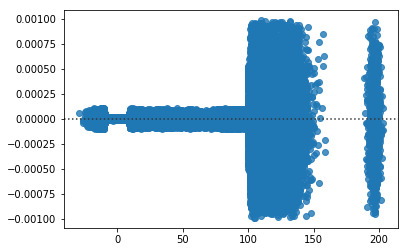

In [41]:
#Finally, lets check for residual regression line of our predicted vs expected
y= y_hat_train - target_train
sns.residplot(target_train, y_hat_train, data=feature_target)

Shows huge outliers with some variables. Now to test it with the ols determined significant features

OLS based features

In [42]:
ols_feature= feature_train[['fc', 'pso', 'sd', 'dso']]

In [65]:
ols_ftest= feature_test[['fc', 'pso', 'sd', 'dso']]

In [66]:
len(ols_feature)

419233

In [67]:
len(ols_ftest)

46582

In [68]:
linreg= LinearRegression()
model= linreg.fit(ols_feature, target_train)

predict_train= linreg.predict(ols_feature)
predict_test= linreg.predict(ols_ftest)

In [69]:
mse_train = np.sum((target_train - predict_train)**2)/len(target_train)
mse_test = np.sum((target_test - predict_test)**2) / len(target_test)
rmse_train=np.sqrt(mse_train)
rmse_test=np.sqrt(mse_test)
print("Train MSE", mse_train)
print("Test MSE", mse_test)
print("Train RMSE", rmse_train)
print("Test RMSE", rmse_test)

Train MSE scalar_coupling_constant    6.594472e-09
dtype: float64
Test MSE scalar_coupling_constant    6.482315e-09
dtype: float64
Train RMSE scalar_coupling_constant    0.000081
dtype: float64
Test RMSE scalar_coupling_constant    0.000081
dtype: float64


Numbers are same as before. Let's look at the vis then

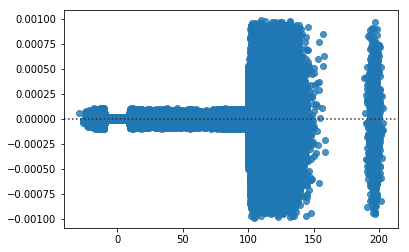

In [73]:
#Finally, lets check for residual regression line of our predicted vs expected
y= predict_train - target_train
sns.residplot(target_train, y, data=ols_feature)

I must not be understanding the data properly. 
Even with the higher correlated data, there appears to be no difference. 
Time to look into other methods. Perhaps some form of random forest